<center>Kmeans Digits Classification<center>
<center>datasets:https://scikit-learn.org/stable/datasets.html<center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

In [2]:
#loading digit dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

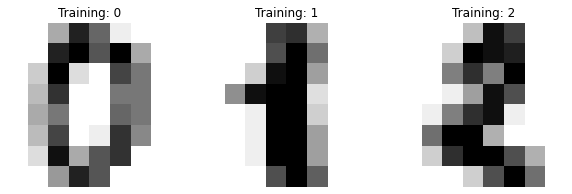

In [4]:
#show the first 3 images

_, fig = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
for ax, image, label in zip(fig, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Training: %i" % label)

In [8]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

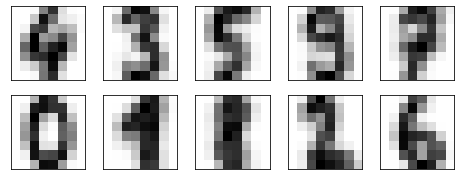

In [14]:
fig, ax = plt.subplots(nrows= 2, ncols =5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest',cmap=plt.cm.binary)

In [29]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

clusters = kmeans.fit_predict(digits.data)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
accuracy_score(digits.target,labels)

0.7935447968836951